In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
print(df.sample(5))
df.dropna(inplace=True)

     Survived   Age      Fare
792         0   NaN   69.5500
587         1  60.0   79.2000
81          1  29.0    9.5000
31          1   NaN  146.5208
130         0  33.0    7.8958


In [4]:
x = df.iloc[:,1:]
y = df['Survived']
print(x)
print(y)
# kbins_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)
# kbins_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)
# trf = ColumnTransformer(
#     [
#         ('first', kbins_age, [0]),
#         ('second', kbins_fare, [1])
#     ])
# x_trs = trf.fit_transform(x)
# x_trs

      Age     Fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
885  39.0  29.1250
886  27.0  13.0000
887  19.0  30.0000
889  26.0  30.0000
890  32.0   7.7500

[714 rows x 2 columns]
0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [5]:
def Discretize(x, y, bins, strategy):
    kbins_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy, subsample=None)
    kbins_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy, subsample=None)
    trf = ColumnTransformer(
        [
            ('first', kbins_age, [0]),
            ('second', kbins_fare, [1])
        ])
    # print(x.sample(5))
    dt = DecisionTreeClassifier()
    print(f'Accuracy Score of non-binarized data: {cross_val_score(dt, x, y).mean()}')
    x_trs = trf.fit_transform(x)
    # print(x)
    # print(x_trs)
    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
    # x_train_trs = trf.fit_transform(x_train)
    # x_test_trs = trf.transform(x_test)
    # dt.fit(x_train_trs, y_train)
    # y_pred = dt.predict(x_test)
    # print(f"The accuracy score: {accuracy_score(y_pred, y_test)}")
    print(f'Accuracy Score of binarized data: {cross_val_score(dt, x_trs, y).mean()}')
    print(x.columns)
    i=0
    for col in x.columns:
          fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
          sns.histplot(x[col], ax=ax1)
          ax1.set_title(f'Distribution of Non-Binarized {col}')
          sns.histplot(x_trs[:,i], ax=ax2)
          ax2.set_title(f'Distribution of Binarized {col}')
          i=i+1

Accuracy Score of non-binarized data: 0.6316458189697626
Accuracy Score of binarized data: 0.6624642962671131
Index(['Age', 'Fare'], dtype='object')


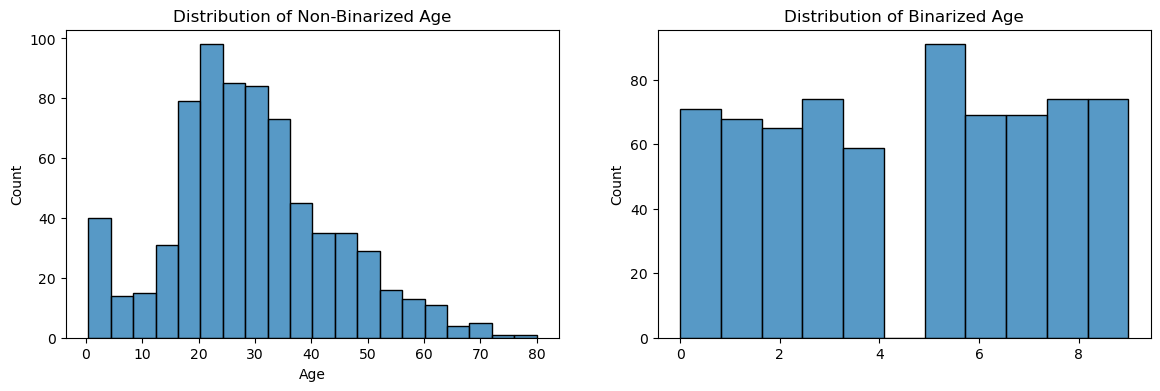

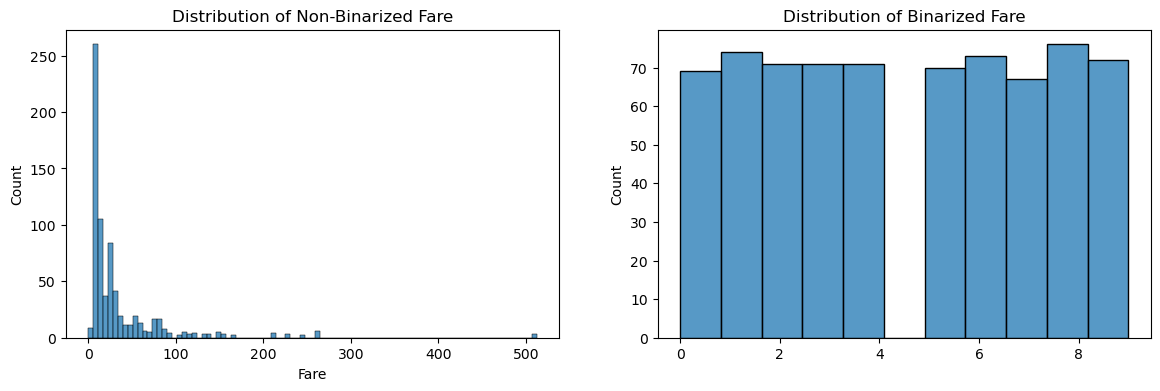

In [6]:
Discretize(x, y, 10, 'quantile')

In [7]:
from sklearn.preprocessing import Binarizer
df1 = pd.read_csv('titanic.csv', usecols=['Age', 'Fare','SibSp', 'Parch'])
df1.sample(5)


,Age,SibSp,Parch,Fare
855,18.0,0,1,9.3500
580,25.0,1,1,30.0000
319,40.0,1,1,134.5000
313,28.0,0,0,7.8958
201,NaN,8,2,69.5500


In [8]:
df1['family'] = df1['SibSp']+df1['Parch']
df1.sample(5)

,Age,SibSp,Parch,Fare,family
387,36.0,0,0,13.0000,0
666,25.0,0,0,13.0000,0
738,NaN,0,0,7.8958,0
77,NaN,0,0,8.0500,0
571,53.0,2,0,51.4792,2


In [22]:
clf1 = ColumnTransformer(
[
    ('Binarizer', Binarizer(copy=False), ['family'])
], remainder='passthrough'
)
df1_trf = clf1.fit_transform(df1)
print(df1_trf)t

[[ 1.     22.      1.      0.      7.25  ]
 [ 1.     38.      1.      0.     71.2833]
 [ 0.     26.      0.      0.      7.925 ]
 ...
 [ 1.         nan  1.      2.     23.45  ]
 [ 0.     26.      0.      0.     30.    ]
 [ 0.     32.      0.      0.      7.75  ]]
